In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_app = pd.read_csv(r"apps.csv")

In [3]:
df_app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_review = pd.read_csv(r"user_reviews.csv")
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [7]:
df_app.shape

(9659, 14)

In [8]:
df_review.shape

(64295, 5)

In [9]:
df_review.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37432.0,0.182146,0.351301,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37432.0,0.492704,0.259949,0.0,0.357143,0.514286,0.65,1.0


In [10]:
df_app.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9659.0,5666.172896,3.102363e+03,0.0,3111.5,5814.0,8327.5,10840.0
Rating,8196.0,4.173243,5.366247e-01,1.0,4.0,4.3,4.5,5.0
Reviews,9659.0,216592.563826,1.831320e+06,0.0,25.0,967.0,29401.0,78158306.0
Size,8432.0,20.395327,2.182751e+01,0.0,4.6,12.0,28.0,100.0


In [11]:
# Convert 'Installs' and 'Price' to numeric in df_app
df_app['Installs'] = df_app['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df_app['Price'] = df_app['Price'].str.replace('$', '').astype(float)

In [12]:
df_app.isnull().sum()

,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [13]:
df_review.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [14]:
df_app['Rating'].fillna(df_app['Rating'].median(), inplace=True)
df_app['Size'].fillna(df_app['Size'].median(), inplace=True)

In [15]:
# Drop rows where Current Ver or Android Ver is missing
df_app_cleaned = df_app.dropna(subset=['Current Ver', 'Android Ver'])

# Verify the result
print(df_app_cleaned[['Current Ver', 'Android Ver']].isnull().sum())
print(f"Remaining rows: {df_app_cleaned.shape[0]}")

Current Ver    0
Android Ver    0
dtype: int64
Remaining rows: 9649


In [16]:
df_app_cleaned.isnull().sum()

,0
Unnamed: 0,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0


In [17]:
# Drop rows with missing values in the Sentiment-related columns
df_review_cleaned = df_review.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Check the cleaned dataset
print("After dropping rows with missing sentiment data:")
print(df_review_cleaned.isnull().sum())
print(f"Remaining rows: {df_review_cleaned.shape[0]}")

After dropping rows with missing sentiment data:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64
Remaining rows: 37427


In [18]:
# Convert 'Last Updated' to datetime
df_app_cleaned['Last Updated'] = pd.to_datetime(df_app_cleaned['Last Updated'])

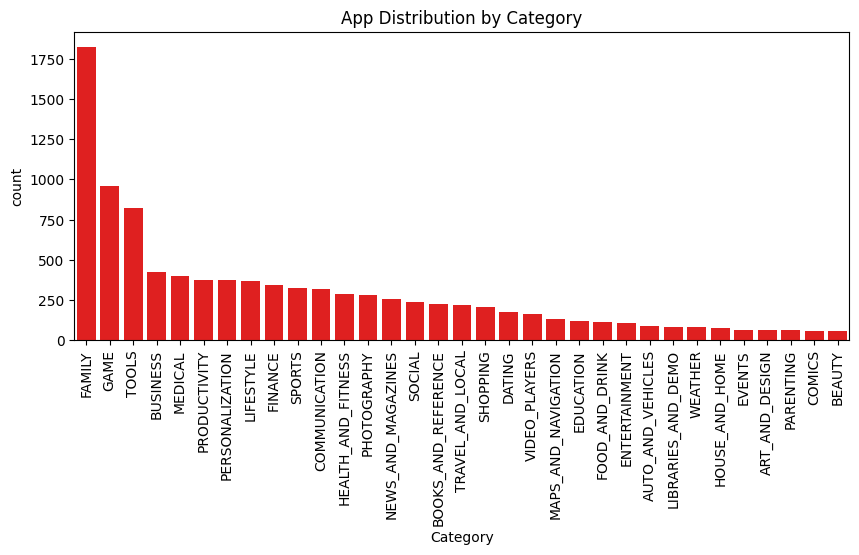

In [19]:
# App distribution by Category
plt.figure(figsize=(10,4))
sns.countplot(data=df_app_cleaned, x='Category', color='Red',order=df_app_cleaned['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('App Distribution by Category')
plt.show()

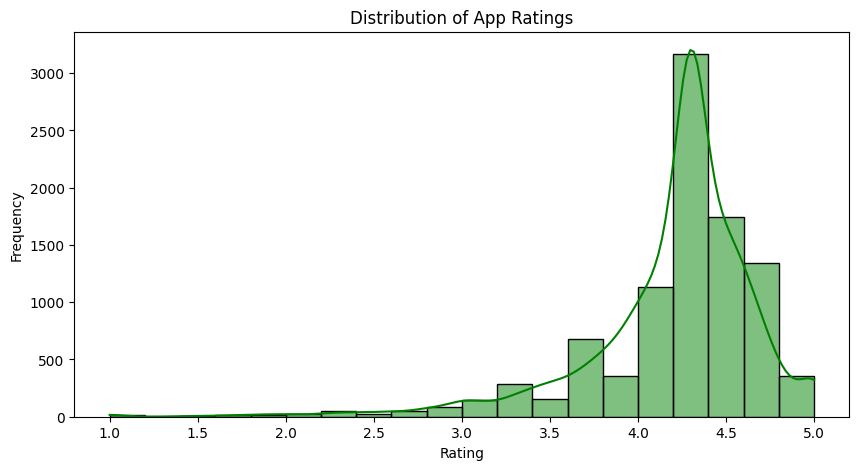

In [20]:
# Rating distribution
plt.figure(figsize=(10,5))
sns.histplot(df_app_cleaned['Rating'].dropna(), bins=20, kde=True,color='Green')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

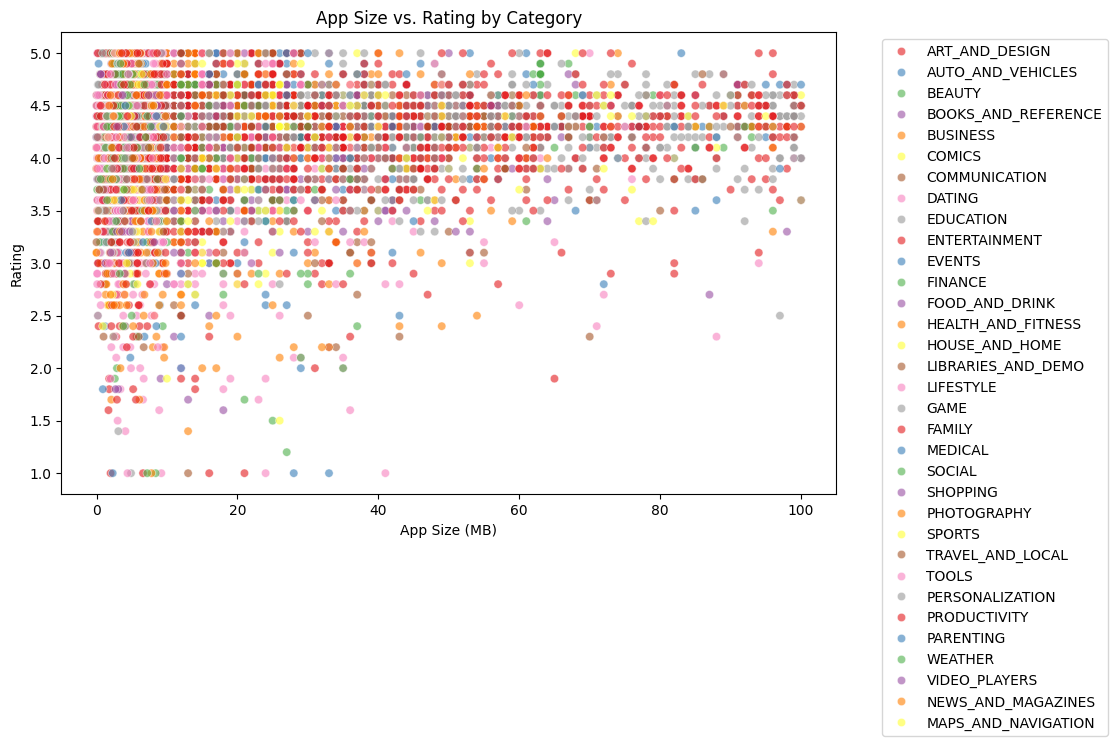

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', hue='Category', data=df_app, alpha=0.6, palette='Set1')
plt.title('App Size vs. Rating by Category')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

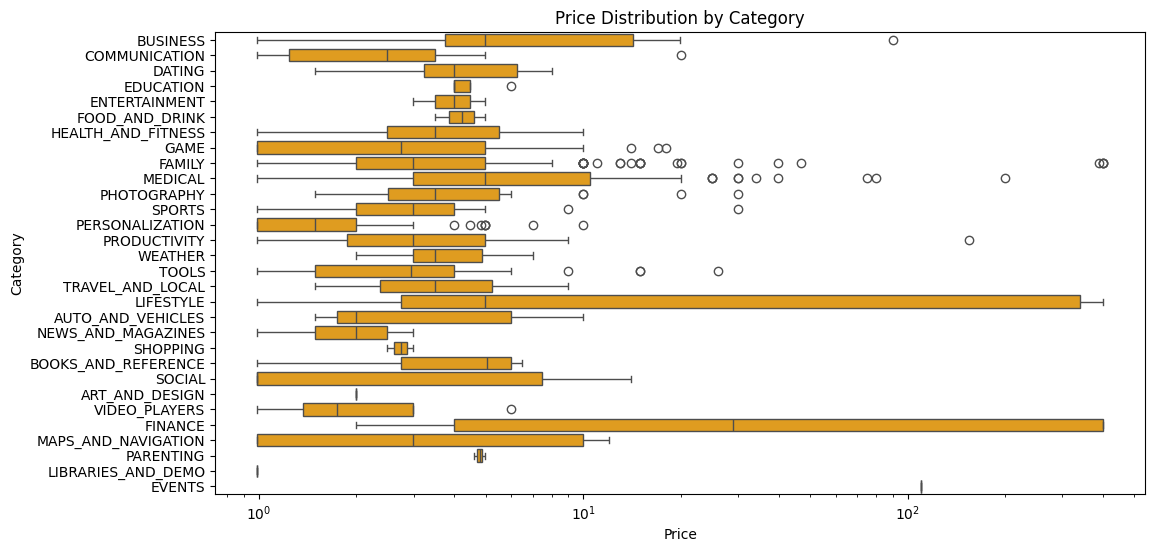

In [22]:
df_paid_apps = df_app_cleaned[df_app_cleaned['Price'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', y='Category', data=df_paid_apps,color='Orange')
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.xscale('log')  # Log scale for better visualization of price ranges
plt.show()

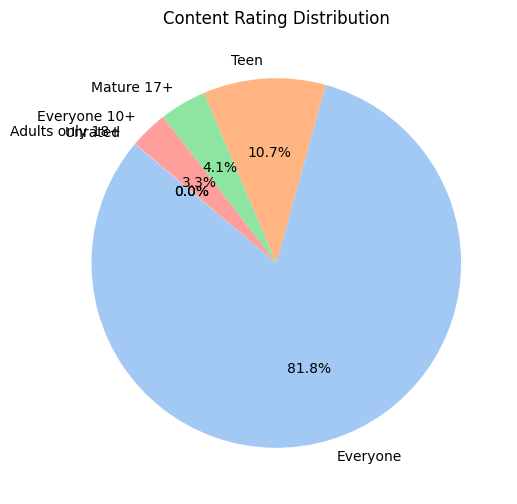

In [23]:
plt.figure(figsize=(10, 6))
df_app_cleaned['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Content Rating Distribution')
plt.ylabel('')
plt.show()

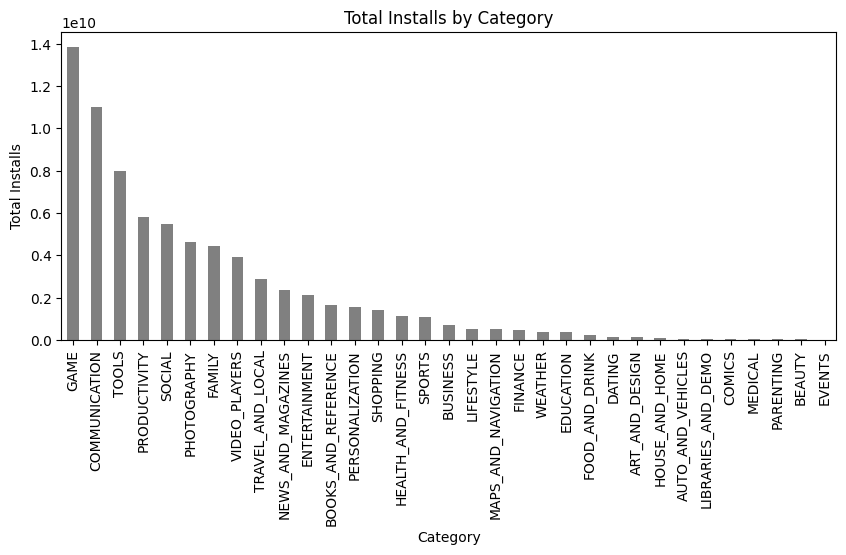

In [24]:
installs_by_category = df_app_cleaned.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
installs_by_category.plot(kind='bar', color='Gray')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()

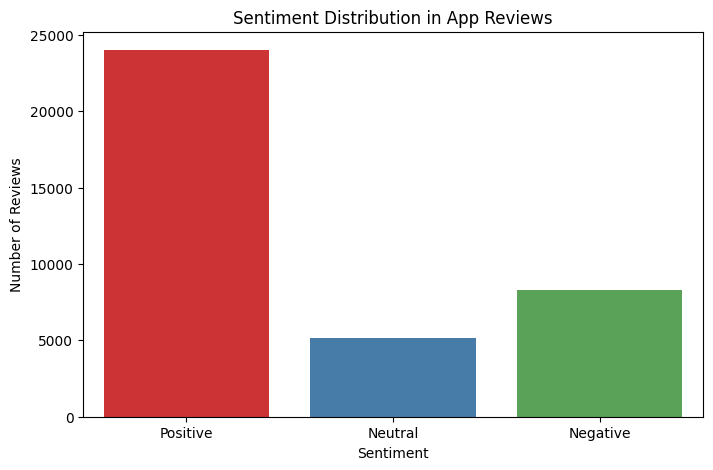

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_review_cleaned, x='Sentiment', palette='Set1')
plt.title('Sentiment Distribution in App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

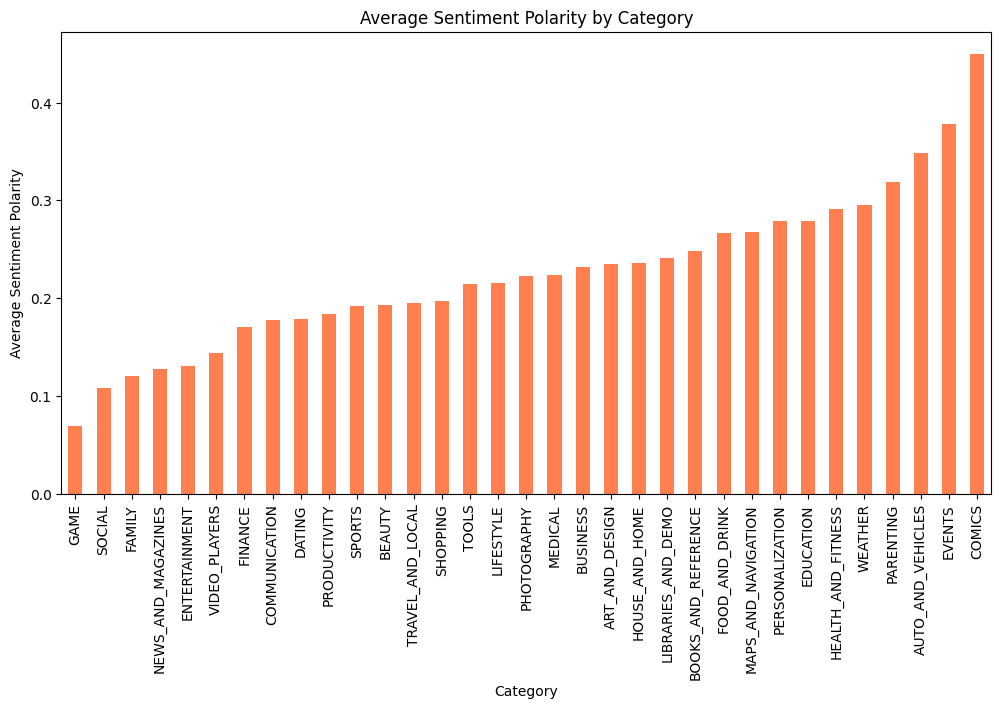

In [26]:
# Merge df_app and df_review on the 'App' column
df_merged = pd.merge(df_app_cleaned, df_review_cleaned, on='App')

# Calculate average sentiment polarity by category
avg_sentiment_polarity = df_merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_sentiment_polarity.plot(kind='bar', color='coral')
plt.title('Average Sentiment Polarity by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Polarity')
plt.show()

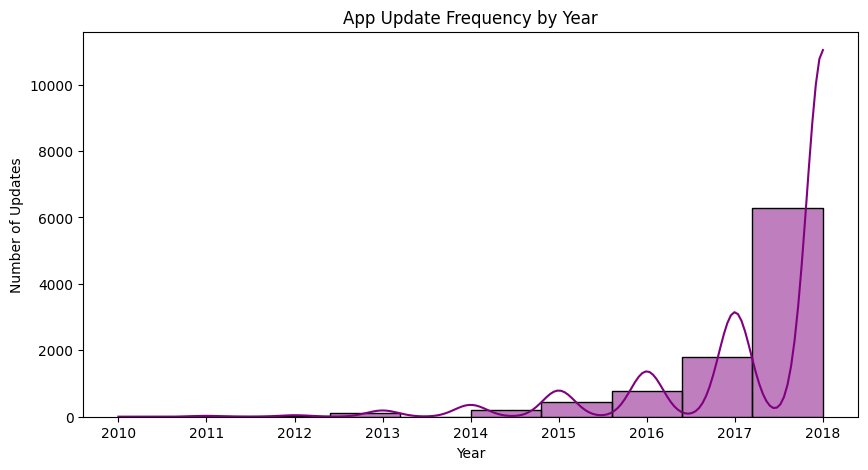

In [27]:
df_app_cleaned['Last Updated'] = pd.to_datetime(df_app_cleaned['Last Updated'])
df_app_cleaned['Last Updated Year'] = df_app_cleaned['Last Updated'].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df_app_cleaned['Last Updated Year'], bins=10, kde=True, color='purple')
plt.title('App Update Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()